In [1]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

## Inspecting the Dataset

In [8]:
ims = idx2numpy.convert_from_file('./raw/t10k-images-idx3-ubyte')
labels = idx2numpy.convert_from_file('./raw/t10k-labels-idx1-ubyte')

print(f"{ims.shape = }")
print(f"{labels.shape = }")
print(f"classes: {np.unique(labels)}")

ims.shape = (10000, 28, 28)
labels.shape = (10000,)
classes: [0 1 2 3 4 5 6 7 8 9]


Classes in numbers:

```rust
0 => "T-shirt/top",
1 => "Trouser",
2 => "Pullover",
3 => "Dress",
4 => "Coat",
5 => "Sandal",
6 => "Shirt",
7 => "Sneaker",
8 => "Bag",
9 => "Ankle Boot",
```

9


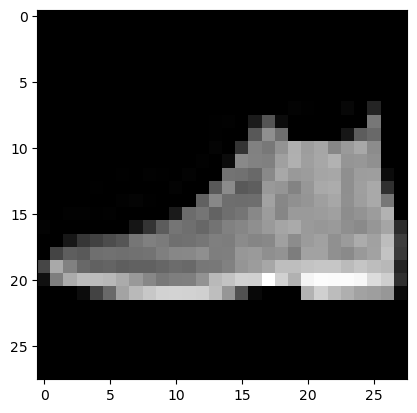

In [14]:
print(labels[0])
plt.imshow(ims[0], cmap='gray')

## Inspecting the Images

im.shape = (784,)
np.unique(im) = array([  0,   1,   2,   3,   4,   7,   8,  11,  12,  16,  21,  22,  23,
        26,  27,  36,  37,  43,  48,  49,  53,  54,  58,  62,  65,  67,
        68,  70,  76,  82,  84,  85,  88,  89,  90,  92,  93,  94,  97,
        98,  99, 100, 102, 103, 104, 106, 108, 109, 110, 111, 113, 114,
       115, 117, 118, 119, 120, 123, 125, 126, 127, 128, 129, 130, 131,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 146, 147,
       148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 176, 177,
       178, 184, 185, 187, 188, 189, 190, 195, 196, 197, 198, 199, 206,
       208, 209, 210, 211, 220, 245, 247, 251, 252, 255], dtype=uint8)


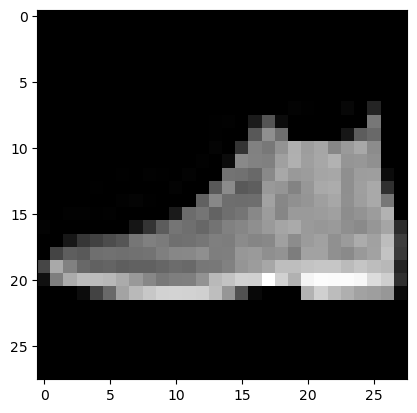

In [15]:
im = ims[0].flatten()

print(f"{im.shape = }")
print(f"{np.unique(im) = }")
plt.imshow(np.reshape(im, [28,28]), cmap='gray')

## Quantization

Let's quantize according to https://github.com/princess-elisabeth/elisabeth_usecase/blob/master/src/fmnist.rs
```rust
let image_data = images_data.data[start..start + image_size]
            .into_iter()
            .map(|x| {
                if let Some(n_bits) = quantization {
                    u4((*x as f64 / 255. * (2_f64.powi(n_bits as i32) - 1.)).round() as u8)
                } else {
                    u4(*x)
                }
            })
            .collect();
```


In [29]:
def quantization(input_im: np.ndarray, n_bits: int) -> np.ndarray:
    assert n_bits <= 7
    quant_im = np.ceil(input_im / 255. * (2**n_bits) - 1)
    quant_im[np.where(quant_im<0)] = 0
    quant_im = np.uint8(quant_im)
    print(f"{np.unique(quant_im) = }")
    return quant_im

np.unique(quant_im) = array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)


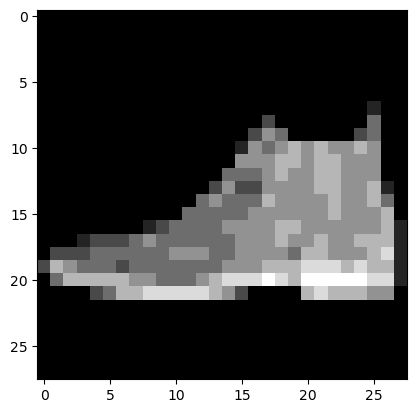

In [31]:
im_3_bits = quantization(im, 3)
plt.imshow(im_3_bits.reshape([28,28]), cmap="gray")

np.unique(quant_im) = array([0, 1, 2, 3], dtype=uint8)


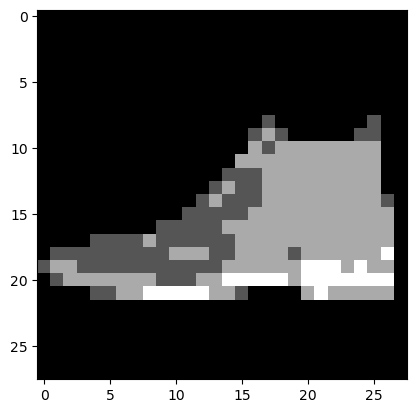

In [32]:
im_2_bits = quantization(im, 2)
plt.imshow(im_2_bits.reshape([28,28]), cmap="gray")

np.unique(quant_im) = array([0, 1], dtype=uint8)


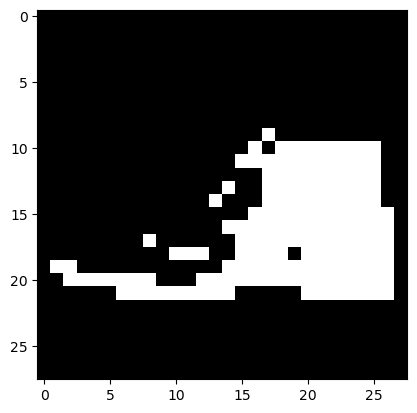

In [23]:
im_1_bit = quantization(im, 1)
plt.imshow(im_1_bit.reshape([28,28]), cmap="gray")